In [1]:
# Importando os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Importando o arquivo cert_2010-2019.csv para um DataFrame

df = pd.read_csv("/content/drive/MyDrive/Datasets/cert_2010-2019.csv", sep=";")

## Análise dos Dados



Esta etapa tem como objetivo criar uma consciência situcional e permitir um entendimento de como os dados estão estruturados.


**Dicionários das variáveis**

* `Incidentes` - Total de incidentes reportados
* `Ameaças` -  Tipo de ameaças


In [3]:
# Mostrar as 5 primeiras entradas 
df.head()


,Ano,Mes,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,62481,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,70069,7707,2192,27,4179,54401,1459,104
2,2019,Março,85409,4476,29309,19,2006,47966,1521,112
3,2019,Abril,59900,7624,2718,37,1555,45774,2119,73
4,2019,Maio,52129,6555,15773,74,1425,25521,2633,148


## Identificando quantos atributos e quantas entradas o nosso conjunto de dados possui. Em seguida, verificando quais os tipos das variáveis.

Vale a pena salientar, que esse conjunto mencionado foi baixado da platadorma Kaggle, considerada a maior comunidade da internet, para assuntos relacionado com Data Science. Hoje, ela conta com mais de 536 mil menbros ativos, apresentando tutoriais, competições, rankings, cursos, dicas, fóruns, datasets e muito mais.





In [4]:
# Identidicando o volume de dados do DataFrame

print("Entrada: \t {}".format(df.shape[0]))
print("Variáveis: \t {}".format(df.shape[1]))
print("\t")

# Verificando o tipo de cada variável no dataset
display(df.dtypes)


Entrada: 	 120
Variáveis: 	 10
	


Ano         int64
Mes        object
Total       int64
Worm        int64
DOS         int64
Invasao     int64
Web         int64
Scan        int64
Fraude      int64
Outros      int64
dtype: object

## Covertendo a coluna "Ano" tipo inteiro para objeto.

In [5]:
# Convertendo a coluna Ano para objeto

df["Ano"] = df["Ano"].astype("object")

#Exibindo novamente o tipo de cada variável

display(df.dtypes)

Ano        object
Mes        object
Total       int64
Worm        int64
DOS         int64
Invasao     int64
Web         int64
Scan        int64
Fraude      int64
Outros      int64
dtype: object

## Verificando se há valores ausentes no DataFrame

In [6]:
df.isnull().sum()

Ano        0
Mes        0
Total      0
Worm       0
DOS        0
Invasao    0
Web        0
Scan       0
Fraude     0
Outros     0
dtype: int64

## Relação entre Ano e Total de Incidentes de Segurança da Informação

In [7]:
df.groupby("Ano")["Total"].sum()


Ano
2010     142844
2011     399515
2012     466029
2013     352925
2014    1047031
2015     722205
2016     647112
2017     833775
2018     676514
2019     875327
Name: Total, dtype: int64

## Plotando essa relação (Ano x Incidentes de Segurança)

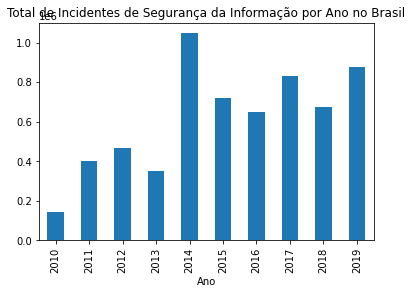

In [8]:
df.groupby("Ano")["Total"].sum().plot.bar(title= "Total de Incidentes de Segurança da Informação por Ano no Brasil");


## Filtrando os incidentes apenas dos anos de 2014 e retirando a variável "Total" do dataframe

In [9]:
incidentes_2014 = df.loc[df.Ano == 2014]
incidentes_2014 = incidentes_2014.drop(["Total"], axis = 1)
incidentes_2014.head()

,Ano,Mes,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
60,2014,Janeiro,2853,6539,590,1267,13916,7248,1546
61,2014,Fevereiro,4163,6190,764,1434,19862,9616,1198
62,2014,Março,9238,2829,780,1253,22471,7780,1457
63,2014,Abril,3513,1505,1559,1900,23320,8562,1174
64,2014,Maio,2857,8383,293,1997,20756,12962,1317


## Para facilitar o entendimentos dos dados, foi feita uma adequação dos dados, onde foi inserido os tipo de ameaças na coluna "Ameaças" e o total de incidentes na coluna "Incidentes".

In [10]:
incidentes_2014_melted = pd.melt(incidentes_2014, 
                                 id_vars = ['Ano', 'Mes'],
                                 value_vars = ['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                                 var_name = 'Ameaças',
                                 value_name = 'Incidentes')

incidentes_2014_melted


,Ano,Mes,Ameaças,Incidentes
0,2014,Janeiro,Worm,2853
1,2014,Fevereiro,Worm,4163
2,2014,Março,Worm,9238
3,2014,Abril,Worm,3513
4,2014,Maio,Worm,2857
...,...,...,...,...
79,2014,Agosto,Outros,1012
80,2014,Setembro,Outros,1215
81,2014,Outubro,Outros,1242
82,2014,Novembro,Outros,992


## Aqui foi plotado um gráfico que mostra os tipos de Ameaças e o total de incidentes ocorridos no ano de 2014 em ordem crescente.

Total de Incidentes no ano de 2014: 1047031


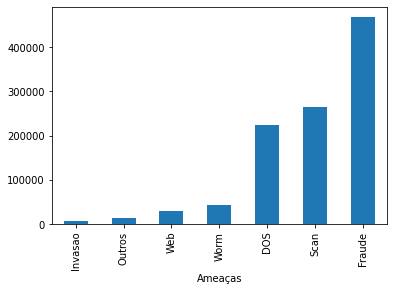

In [11]:
incidentes_2014_melted.groupby("Ameaças")["Incidentes"].sum().sort_values().plot(kind="bar")
inc_2014_total = incidentes_2014_melted.Incidentes.sum()
print("Total de Incidentes no ano de 2014: {}".format(inc_2014_total))    

## Feito uma análise gráfica, onde foi mostrada a quantidade total de Incidentes para cada tipo de ameaça ao longo dos 12 meses do ano de 2014.

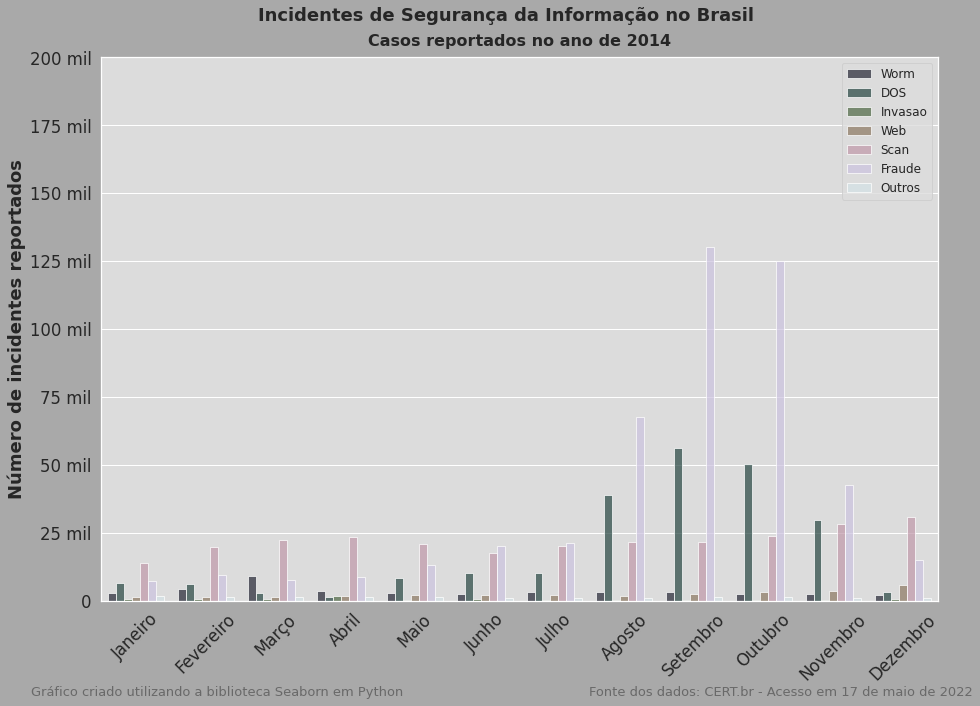

In [12]:
# Definindo temas
sns.set_theme(context = "notebook", 
              font_scale = 1.5,
              rc={'figure.facecolor':'darkgray', 'axes.facecolor':'gainsboro'})

# Criando figura
plt.figure(figsize=(15, 10))

# Plotando os dados com um gráfico de barras
fig = sns.barplot(data=incidentes_2014_melted,
                  x='Mes',
                  y = 'Incidentes',
                  ci = False,
                  hue = 'Ameaças',
                  hue_order = ['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                  palette = 'cubehelix',
                  saturation = 0.5,
                  alpha = 0.7)

# Tamanho da legenda
plt.legend(fontsize  = 12)

# Configurações do eixo X
plt.xlabel("")
plt.xticks(rotation=45)

# Configurações do eixo Y
plt.yticks(ticks = range(0,225000, 25000),
           labels = ['0', '25 mil', '50 mil', '75 mil', '100 mil', '125 mil', '150 mil', '175 mil', '200 mil'])
plt.ylabel("Número de incidentes reportados", weight='semibold')

# Configurações do título e subtítulo
plt.suptitle("Incidentes de Segurança da Informação no Brasil", y=0.95, fontsize=18, weight='bold', horizontalalignment='center')
plt.title("Casos reportados no ano de 2014", y=1.01, fontsize=16, weight='semibold', horizontalalignment='center')


# Textos auxiliares no gráfico
plt.text(12, -35000, "Fonte dos dados: CERT.br - Acesso em 17 de maio de 2022", 
         horizontalalignment='right',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, -35000, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

# Salva a figura
plt.savefig("incidentes_2019_seaborn.png")

# Mostra o gráfico
plt.show()

## Resumo estatístico dos incidentes reportados

Após a análise descrita, foi percebido que há outlliers no número de incidentes das ameaças  (DOS e Invasão) nos meses de Agosto, Setembro e Outubro. E para confirmar isso, foi feito os seguintes passos:

* Resumo estatístico por meio do método `describe()`
* Plotado `boxplots` para a variável.

In [13]:
# Resumo estatístico

incidentes_2014_melted[['Incidentes']].describe()


,Incidentes
count,84.000000
mean,12464.654762
std,22533.558849
min,187.000000
25%,1263.500000
50%,3094.000000
75%,15597.500000
max,130108.000000


Olhando o resumo estatístico acima, pode-se confirmar algumas hipóteses, como:
* O valor máximo 130108.00 é muito maior quando comparado com a mediana 3094.00. A mesma lógica serve para o valor mínimo 187.00.

* A variável Incidentes possui 75% do valor abaixo de 15597.50, porém, seu valor máximo é 130108.00

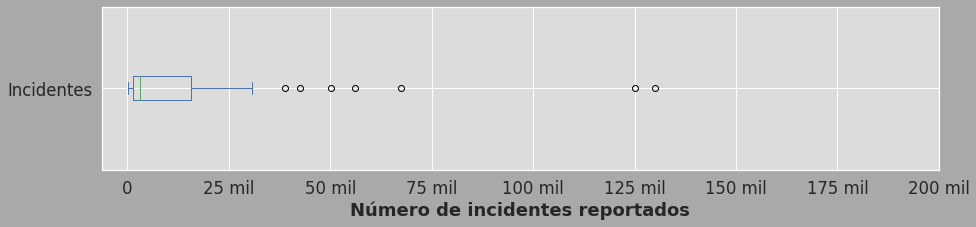

In [14]:
# Boxplots

incidentes_2014_melted.Incidentes.plot(kind='box', vert=False, figsize=(15,3))

# Configurações do eixo Y
plt.xticks(ticks = range(0,225000, 25000),
           labels = ['0', '25 mil', '50 mil', '75 mil', '100 mil', '125 mil', '150 mil', '175 mil', '200 mil'])
plt.xlabel("Número de incidentes reportados", weight='semibold')

plt.show()

* Olhando detalhadamente para o Box, percebe-se que os pontos descritos como outlliers são exatamente os valores mostrados no gráfico de Incidentes de Segurança nos meses de Agosto, Setembro e Outubro.

## Conclusões

Apatir dos dados estudados, percebe-se que no ano de 2014 o total de incidentes reportados foram considerados destaques dentre os outros. Isso pôde ser comprovado no gráfico (Indcidentes de Segurança da Informação no Brasil no ano de 2014) onde foram comparados todos os ataques nos anos entre 2010-2019. Em seguida, foi visto que nos meses de agosto, setembro e outubro os números de incidentes extrapolaram em relação aos demais, com destaque para as ameaças DOS e Fraudes, considerando assim possível presença de outlliers. Com o objetivo de ver, com mais clareza, esses pontos que se diferenciavam dos demais, foi realizado um resumo estatístico e plotado o boxplot para a variável `Incidente`. Essa ação possibilitou verificar e confirmar presença de outlliers.

Fato interessante a ser dito nessa análise exoploratória, foi a de que as notícias divulgadas na Abranet (Associação Brasileira de Internet) e no CERT.br (Centro de Estudos, Resposta e Tratamento de Incidentes de Segurança no Brasil) foram condizentes essa análisse realizada.

Verificar links abaixo:

 - https://www.abranet.org.br/Noticias/Incidentes-de-seguranca-aumentam-197%25-em-2014-na-comparacao-com-o-ano-anterior-539.html?UserActiveTemplate=site

- https://www.cgi.br/noticia/releases/cert-br-registra-aumento-de-ataques-de-negacao-de-servico-em-2014/

 
